https://prohack.org/page/challenge
## The Goal : Optimize our well-being across all those galaxies

Only two steps prevent us from achieving singularity
- To understand what makes us better off.

Our elders used the composite index to measure our well-being performance, but this knowledge has disappeared in the sands of time.<br>
Use our data and train your model to predict this index with the highest possible level of certainty.

- To achieve the highest possible level of well-being through optimized allocation of additional energy

We have discovered the star of an unusually high energy of 50000 zillion DSML.
<br>We have agreed between ourselves that 

- no one galaxy will consume more than 100 zillion DSML 

and 

- at least 10% of the total energy will be consumed by galaxies in need with existence expectancy index below 0,7.
      
Think of our galaxies as your “countries” (or how you call them??) and our population as citizens. We have similar healthcare and wellbeing characteristic as you, Hooomans


### FAQ1: 
The solutions are evaluated on two criteria: predicted future Index values and allocated energy from a newly discovered star

1) Index predictions are evaluated using RMSE metric

2) Energy allocation is also evaluated using RMSE metric and has a set of known factors that need to be taken into account.

Every galaxy has a certain limited potential for improvement in the index described by the following function: 
- Potential for increase in the Index = -np.log(Index+0.01)+3

Likely index increase dependent on potential for improvement and on extra energy availability is described by the following function:
- Likely increase in the Index = extra energy * Potential for increase in the Index **2 / 1000

There are also several constraints:
- in total there are 50000 zillion DSML available for allocation
- no galaxy should be allocated more than 100 zillion DSML or less than 0 zillion DSML
- galaxies with low existence expectancy index below 0.7 should be allocated at least 10% of the total energy available

3) Leaderboard is based on a combined scaled metric:

- 80% prediction task RMSE + 20% optimization task RMSE * lambda
where lambda is a normalizing factor


4) Leaderboard is 80% public and 20% private


5) The submission should be in the following format:
<img src = 'format.png'>

In [19]:
import numpy as np  # Scientific computing
import pandas as pd # Data analysis and manipulation

from datetime import datetime # Dates and times manipulations

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Plotly is a graphing library for interactive, publication-quality graphs
# pip install plotly==4.5.4
import plotly.graph_objects as go                   
import plotly.express as px
from plotly.subplots import make_subplots

from ipywidgets import interact

import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

pd.set_option('display.max_rows', 80)

In [4]:
train.head()

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  ...  \
0                                    NaN              NaN  ...   
1                               0.833624         0.467873  ...   
2                               0.469110         0.363837  ...   
3                                    NaN              NaN  ...   
4                               0.910341         0.918353  ...   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Gender Development Index (GDI)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

   Intergalactic Development Index (IDI), female, Rank  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                                NaN                    NaN   
1                                                NaN              19.177926   
2                                                NaN              21.151265   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                                NaN                           
1                                                NaN                           
2                                           6.534020                           
3                                           5.912194                           
4                                  

In [5]:
test.head()

galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   

   Mean years of education (galactic years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   

   Intergalactic Development Index (IDI)  Education Index  ...  \
0                               0.547114         0.556267  ...   
1                               0.497688         0.409969  ...   
2                               0.544744         0.486167  ...   
3                               0.691641         0.523441  ...   
4                               0.530676         0.580418  ...   

   Current health expenditure (% of GGP)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                               7.357729   

   Intergalactic Development Index (IDI), female  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                       0.583373   

   Intergalactic Development Index (IDI), male  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                     0.600445   

   Gender Development Index (GDI)  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                        0.856158   

   Intergalactic Development Index (IDI), female, Rank  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                         206.674424     

   Intergalactic Development Index (IDI), male, Rank  Adjusted net savings   \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3                                                NaN                    NaN   
4                                         224.104054                    NaN   

   Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total  \
0                                                NaN                           
1                                                NaN                           
2                   

In [6]:
print(f'The shape : {train.shape}')
print('_'*50)
print(train.info())

The shape : (3865, 80)
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
galactic year                                                                              3865 non-null int64
galaxy                                                                                     3865 non-null object
existence expectancy index                                                                 3864 non-null float64
existence expectancy at birth                                                              3864 non-null float64
Gross income per capita                                                                    3837 non-null float64
Income Index                                                                               3837 non-null float64
Expected years of education (galactic years)                                               3732 non-null float64
Mean years of education (galact

In [7]:
print(f'The shape : {test.shape}')
print('_'*50)
print(test.info())

The shape : (890, 79)
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 79 columns):
galactic year                                                                              890 non-null int64
galaxy                                                                                     890 non-null object
existence expectancy index                                                                 885 non-null float64
existence expectancy at birth                                                              885 non-null float64
Gross income per capita                                                                    885 non-null float64
Income Index                                                                               885 non-null float64
Expected years of education (galactic years)                                               885 non-null float64
Mean years of education (galactic years) 

In [331]:
cols = train.columns.tolist()
cols_num = [col for col in cols if col != 'galaxy']

features = cols[:-1]
features_num = cols_num[:-1]
features_cat = 'galaxy'

label = 'y'

In [323]:
for col in cols[:2]:
    print(train[col].value_counts())
    print('_'*50)

990025     181
995006     180
1006009    180
1004004    180
1002001    180
1000000    180
998001     180
996004     180
994009     180
992016     180
991020     180
1005006    180
1001000    180
997002     180
993012     180
1003002    180
999000     180
1009020     90
1011030     90
1007012     90
1008016     90
1010025     90
1012036     90
1013042     89
1014049     88
1015056     87
Name: galactic year, dtype: int64
__________________________________________________
Andromeda XIX[60]                              26
Tucana Dwarf                                   26
Andromeda XXII[57]                             26
Andromeda XXIV                                 26
Andromeda XII                                  26
                                               ..
Andromeda X                                    17
Pegasus Dwarf Irregular (DDO 216)              17
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Andromeda XXI[57]                              17
NGC 5253                 

In [15]:
train.isna().sum()

galactic year                                                                                 0
galaxy                                                                                        0
existence expectancy index                                                                    1
existence expectancy at birth                                                                 1
Gross income per capita                                                                      28
Income Index                                                                                 28
Expected years of education (galactic years)                                                133
Mean years of education (galactic years)                                                    363
Intergalactic Development Index (IDI)                                                       391
Education Index                                                                             391
Intergalactic Development Index (IDI), R

In [16]:
test.isna().sum()

galactic year                                                                                0
galaxy                                                                                       0
existence expectancy index                                                                   5
existence expectancy at birth                                                                5
Gross income per capita                                                                      5
Income Index                                                                                 5
Expected years of education (galactic years)                                                 5
Mean years of education (galactic years)                                                     8
Intergalactic Development Index (IDI)                                                        8
Education Index                                                                              8
Intergalactic Development Index (IDI), Rank       

In [17]:
train.describe()

galactic year  existence expectancy index  \
count   3.865000e+03                 3864.000000   
mean    1.000709e+06                    0.872479   
std     6.945463e+03                    0.162367   
min     9.900250e+05                    0.227890   
25%     9.950060e+05                    0.763027   
50%     1.000000e+06                    0.907359   
75%     1.006009e+06                    0.992760   
max     1.015056e+06                    1.246908   

       existence expectancy at birth  Gross income per capita  Income Index  \
count                    3864.000000              3837.000000   3837.000000   
mean                       76.798111             31633.240872      0.825154   
std                        10.461654             18736.378445      0.194055   
min                        34.244062              -126.906522      0.292001   
25%                        69.961449             20169.118912      0.677131   
50%                        78.995101             26600.768195      0.827300   
75%                        84.558971             36898.631754      0.970295   
max                       100.210053            151072.683156      1.361883   

       Expected years of education (galactic years)  \
count                                   3732.000000   
mean                                      14.723296   
std                                        3.612546   
min                                        3.799663   
25%                                       12.592467   
50%                                       14.942913   
75%                                       17.123797   
max                                       26.955944   

       Mean years of education (galactic years)  \
count                               3502.000000   
mean                                  10.283959   
std                                    3.319948   
min                                    1.928166   
25%                                    7.654169   
50%                                   10.385465   
75%                                   12.884752   
max                                   19.057648   

       Intergalactic Development Index (IDI)  Education Index  \
count                            3474.000000      3474.000000   
mean                                0.804246         0.745900   
std                                 0.176242         0.199795   
min                                 0.273684         0.189874   
25%                                 0.671862         0.597746   
50%                                 0.824758         0.761255   
75%                                 0.939043         0.893505   
max                                 1.232814         1.269625   

       Intergalactic Development Index (IDI), Rank  ...  \
count                                  3432.000000  ...   
mean                                    135.129178  ...   
std                                      52.449535  ...   
min                                       9.925906  ...   
25%                                      92.262724  ...   
50%                                     135.914318  ...   
75%                                     175.301993  ...   
max                                     278.786613  ...   

       Intergalactic Development Index (IDI), female  \
count                                     916.000000   
mean                                        0.823561   
std                                         0.185780   
min                                         0.305733   
25%                                         0.690707   
50%                                         0.835410   
75%                                         0.970365   
max                                         1.237661   

       Intergalactic Development Index (IDI), male  \
count                                   915.000000   
mean                                      0.844209   
std                                       0.159041   
min                            

In [171]:
# Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

# Defining a function that counts the number of unique rows
def count_rows_unique(rows):
    return len(rows.unique())

# Feature Engineering

- Correlation Feature / Label *
- Percent missing data per Feature *
- Distribution Features *
- Distribution Feature / Label *
- Enlever les Outliers
- Analyse Label
- Adding Features
- Dummy cat Features

## Correlation Feature / Label

In [70]:
corr_matrix = train.corr()
corr_y = corr_matrix.y.sort_values(ascending=False)
corr_y

y                                                                                          1.000000
Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))           0.679981
Estimated gross galactic income per capita, female                                         0.667465
Interstellar Data Net users, total (% of population)                                       0.651823
Intergalactic Development Index (IDI)                                                      0.625114
Intergalactic Development Index (IDI), male                                                0.622699
Intergalactic Development Index (IDI), female                                              0.614971
Education Index                                                                            0.613938
Expected years of education (galactic years)                                               0.584069
Mean years of education (galactic years)                                                   0.583858


In [154]:
fig = px.bar(x = corr_y.index[1:], y = corr_y[1:])
fig.update_layout(title='Index Correlation',height = 800, margin=dict(b=400))
fig.update_xaxes(automargin=True)
fig.show()

In [159]:
#Correlation map to see how features are correlated with y
#plt.subplots(figsize=(12,9))
#sns.heatmap(corr_matrix, vmax=1, square=True);

fig = go.Figure(data=go.Heatmap(z=corr_matrix, x = cols_num, y = cols_num))
fig.update_layout(title='Correlation Matrix',height = 1000, width = 1000, margin=dict(b=400))
fig.show()

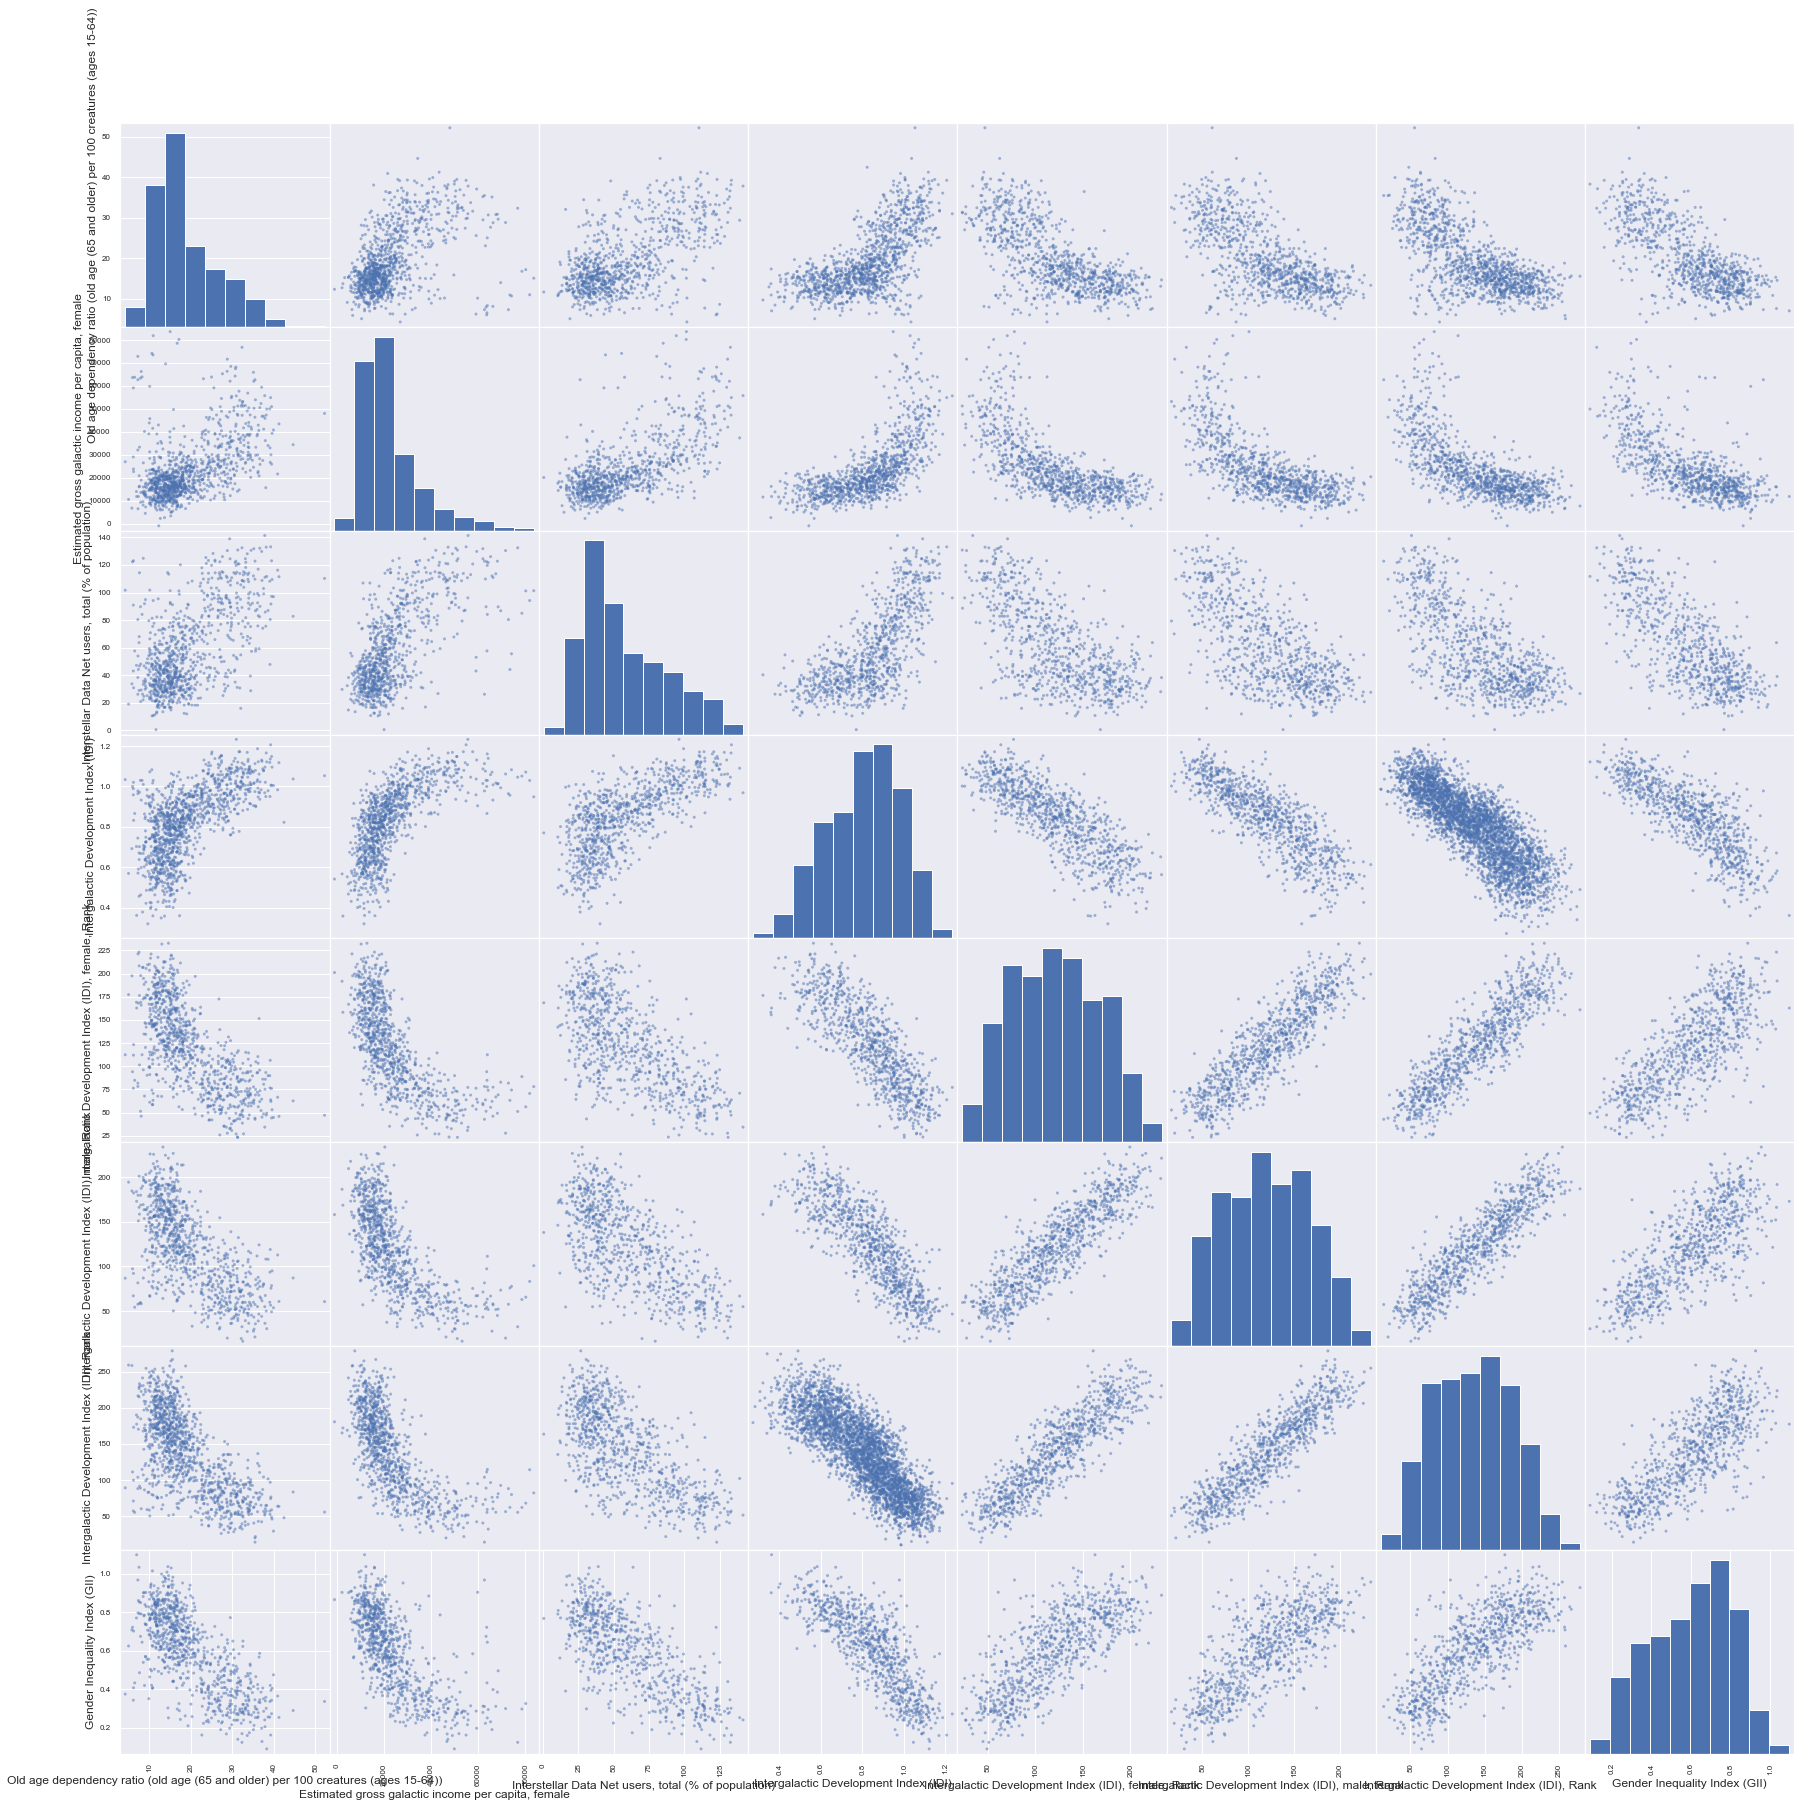

In [254]:
from pandas.plotting import scatter_matrix

attributes = [*corr_y[corr_y > 0.625][1:].index, *corr_y[corr_y < -0.6].index]
#attributes = [*corr_y[1:4].index, *corr_y[-4:-1].index]
scatter_matrix(train[attributes], figsize=(30, 30));

## Percent missing data

In [166]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
train_na

Gender Inequality Index (GII)                                                              78.163001
Current health expenditure (% of GGP)                                                      77.567917
Interstellar Data Net users, total (% of population)                                       77.438551
Private galaxy capital flows (% of GGP)                                                    77.386805
Interstellar phone subscriptions (per 100 people)                                          76.946960
Intergalactic Development Index (IDI), male, Rank                                          76.921087
Intergalactic Development Index (IDI), female, Rank                                        76.895213
Respiratory disease incidence (per 100,000 people)                                         76.817594
Adjusted net savings                                                                       76.403622
Gender Development Index (GDI)                                                             

In [170]:
fig = px.bar(x = train_na.index, y = train_na)
fig.update_layout(title='Percent missing data',height = 1000, width = 1000, margin=dict(b=400))
fig.show()

## Distribution Features

In [193]:
@interact(col = cols)
def show_hist(col):
    x = train[col]
    
    # Sturge’s Rule to choose the number of bins
    K = int(1 + 3.322 * np.log(len(x.unique())))
    
    return px.histogram(x = x, nbins=K)

interactive(children=(Dropdown(description='col', options=('galactic year', 'galaxy', 'existence expectancy in…

## Distribution Feature / Label

In [174]:
@interact(col = cols)
def show(col):
    return px.scatter(x = train[col], y = train.y)

interactive(children=(Dropdown(description='col', options=('galactic year', 'galaxy', 'existence expectancy in…

## Missing values

In [265]:
sample_incomplete_rows = train[train.isnull().any(axis=1)]
sample_incomplete_rows

galactic year                         galaxy  \
0            990025   Large Magellanic Cloud (LMC)   
1            990025               Camelopardalis B   
2            990025                        Virgo I   
3            990025             UGC 8651 (DDO 181)   
4            990025                   Tucana Dwarf   
...             ...                            ...   
3856        1015056  Sagittarius Dwarf Sphr SagDEG   
3858        1015056                 MB 1 (KK98 21)   
3859        1015056                    Aquarius II   
3863        1015056                          KKs 3   
3864        1015056                       NGC 5237   

      existence expectancy index  existence expectancy at birth  \
0                       0.628657                      63.125200   
1                       0.818082                      81.004994   
2                       0.659443                      59.570534   
3                       0.555862                      52.333293   
4                       0.991196                      81.802464   
...                          ...                            ...   
3856                    1.028583                      82.932426   
3858                    1.023466                      84.764492   
3859                    0.751303                      74.113876   
3863                    0.939034                      78.274427   
3864                    1.032244                      91.641356   

      Gross income per capita  Income Index  \
0                27109.234310      0.646039   
1                30166.793958      0.852246   
2                 8441.707353      0.499762   
3                         NaN           NaN   
4                81033.956906      1.131163   
...                       ...           ...   
3856             29905.519849      0.846355   
3858             49952.097512      1.083077   
3859             20552.719041      0.886003   
3863             28180.459770      0.687655   
3864             73109.215949      1.207746   

      Expected years of education (galactic years)  \
0                                         8.240543   
1                                        10.671823   
2                                         8.840316   
3                                              NaN   
4                                        13.800672   
...                                            ...   
3856                                     21.531881   
3858                                     18.933339   
3859                                     14.608784   
3863                                      9.388911   
3864                                     18.910920   

      Mean years of education (galactic years)  \
0                                          NaN   
1                                     4.742470   
2                                     5.583973   
3                                          NaN   
4                                    13.188907   
...                                        ...   
3856                                 12.462967   
3858                                 16.647474   
3859                                 10.678310   
3863                                  8.908748   
3864                                 16.202486   

      Intergalactic Development Index (IDI)  Education Index  ...  \
0                                       NaN              NaN  ...   
1                                  0.833624         0.467873  ...   
2                                  0.469110         0.363837  ...   
3                                       NaN              NaN  ...   
4                                  0.910341         0.918353  ...   
...                                     ...              ...  ...   
3856                               0.932615         1.082111  ...   
3858                               0.994101         1.153007  ...   
3859                               0.794654         0.880838  ...   
3863                               0.735694    

In [329]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
features_cat_encoded = ordinal_encoder.fit_transform(train[[features_cat]])
features_cat_encoded[:5]

array([[ 96.],
       [ 33.],
       [178.],
       [163.],
       [155.]])

In [330]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = features_num
cat_attribs = [features_cat]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = OneHotEncoder()

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train)
train_prepared

array([[-1.53847803, -1.50210931, -1.30734006, ...,  0.        ,
         0.        ,  0.        ],
       [-1.53847803, -0.33516323,  0.40217158, ...,  0.        ,
         0.        ,  0.        ],
       [-1.53847803, -1.3124519 , -1.64720661, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 2.06592362,  1.00819656,  1.60068695, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.06592362,  0.40995633,  0.14109825, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.06592362,  0.98417283,  1.41912864, ...,  0.        ,
         0.        ,  0.        ]])

In [334]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train.y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train.iloc[:5]
some_labels = train.y.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [0.05413586 0.04934235 0.06127713 0.05232858 0.17538275]


In [336]:
print("Labels:", list(some_labels))

Labels: [0.05258977109572517, 0.05986803016773545, 0.05044906218785139, 0.04939424843578112, 0.15424698544491255]


In [337]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train.y, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.013121338535675493

In [339]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=1000)

train_predictions = model_xgb.predict(train_prepared)
xgb_mse = mean_squared_error(train.y, train_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

XGBoostError: need to call fit or load_model beforehand

In [281]:
train['existence expectancy index']

0       0.628657
1       0.818082
2       0.659443
3       0.555862
4       0.991196
          ...   
3860    1.029704
3861    0.937869
3862    1.036144
3863    0.939034
3864    1.032244
Name: existence expectancy index, Length: 3865, dtype: float64

In [279]:
def select():
    cols = train_na.index
    return {col: abs(corr_y[col]) * 100 / train_na[col]  for col in cols}

selection = select()
sorted(selection.items(), key=lambda x: x[1], reverse=True)

[('existence expectancy at birth', 2148.00257135879),
 ('existence expectancy index', 2115.69032754626),
 ('Income Index', 80.05647669512737),
 ('Gross income per capita', 70.12608898230467),
 ('Expected years of education (galactic years)', 16.973128393712855),
 ('Mean years of education (galactic years)', 6.216560585327233),
 ('Intergalactic Development Index (IDI)', 6.179191328044889),
 ('Intergalactic Development Index (IDI), Rank', 6.0839538322653395),
 ('Education Index', 6.068720800967646),
 ('Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
  1.0104299111471569),
 ('Population using at least basic sanitation services (%)',
  1.002879497065964),
 ('Gender Inequality Index (GII)', 0.9240675943910077),
 ('Estimated gross galactic income per capita, female', 0.918061249123928),
 ('Population using at least basic drinking-water services (%)',
  0.8993605232480651),
 ('Intergalactic Development Index (IDI), male, Rank', 0.8847734209380553),
 ('Interg


 mu = 0.08 and sigma = 0.06



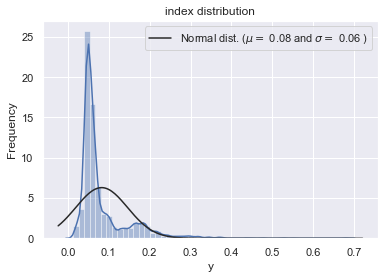

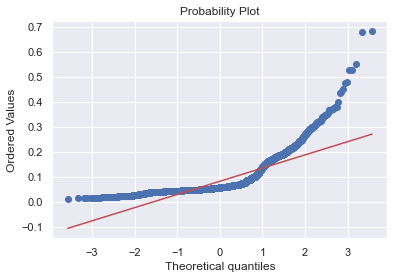

In [21]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train.y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train.y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('index distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train.y, plot=plt)
plt.show()


'''
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["log_y"] = np.log1p(train.y)

#Check the new distribution 
sns.distplot(train.log_y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train.log_y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train.log_y, plot=plt)
plt.show()
'''


 mu = 0.08 and sigma = 0.06



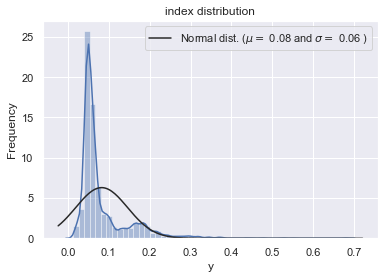

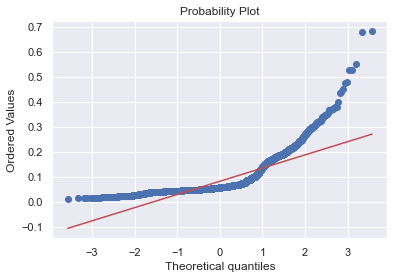

In [240]:
sns.distplot(train.y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train.y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('index distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train.y, plot=plt)
plt.show()


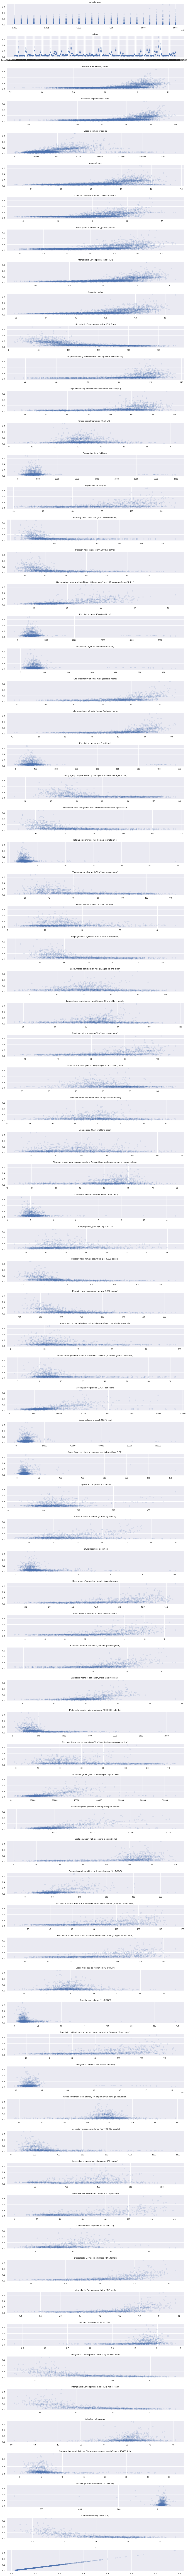

In [172]:
cols = train.columns.values.tolist()
y = train.y.values.tolist()

fig, ax = plt.subplots(len(cols), 1, figsize=(15, 200))

for i, col in enumerate(cols):
    x = train[col].values
    
    ax[i].scatter(x, y, alpha = 0.2)
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [45]:
len(cols)

80

In [183]:
@interact(col = cols)
def show(col = cols):
    return go.Figure(data=go.Scatter(
        x = train[col], 
        y = train.y, 
        mode = 'markers',
        marker=dict(size=3)
    ))

interactive(children=(Dropdown(description='col', options=('galactic year', 'galaxy', 'existence expectancy in…